In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/MANOJ/Documents/week5/nursery/nursery.data",names=['parents','has_nurs','form','children','housing','finance','social','health','class'])
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [3]:
data['class'].unique() # 5 class dataset

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

In [4]:
data['class'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [6]:
X = data.drop('class',axis=1)
Y = data['class']

In [7]:
Y[Y == 'spec_prior'] = 'recommend'
Y[Y == 'very_recom'] = 'recommend'


In [8]:
Y.value_counts()

recommend    4374
not_recom    4320
priority     4266
Name: class, dtype: int64

In [9]:
# To store the test score of 5 iterations in order to compute the mean and variance of testing accuracy.
DecisionTree_categorical = []
DecisionTree_oneHot = [] 
Log_Regression = []
K_Nearest_Neighbors = []

The task is conducted 5 times, therefore the data would be split into train, validation and test 5 times randomly.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

To fit the Decision Tree with Categorical data

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder = LabelEncoder()
for i in X.columns: # Encoding the categorical values of features 
    x_train[i] = encoder.fit_transform(x_train[i])
    x_val[i] = encoder.fit_transform(x_val[i])
    X_test[i] = encoder.fit_transform(X_test[i])

In [51]:
model = DecisionTreeClassifier().fit(x_train,y_train)

In [52]:
parameters = {'max_depth':[i for i in range(1,11)],
              'criterion' :['entropy','gini'],
              'splitter':['best','random'],
              'min_samples_split': [i for i in range(2,11)],
              'min_samples_leaf': [i for i in range(1,11)]}

#### The parameters considered for tuning in Decision Trees:

1. The max depth parameter is searched in range (1,10) as it covers shallow trees and trees of considerable depth.
2. The criterion is chosen to be either gini or entropy which is based on gini index and information gain at each node respectively.
3. The splitter is chosen as either best or random. best chooses the best split at each node based on criterion and random chooses a best split among a random subset of features.
4. min_samples_split range from (2,10), determining the optimum number of samples required to split at a node. Higher value prevents overfitting therefore it is searched till the value 10.
5. min_samples_leaf is searched between (1,10) which specifies the minimum no of samples to be present at each leaf node.

In [53]:
C = GridSearchCV(model, param_grid=parameters, cv=5)
C.fit(x_val,y_val)
Model_categorical = C.best_estimator_
print(f"Best Decision Tree parameters: {C.best_params_}")
    
Model_categorical.fit(x_train, y_train)
DecisionTree_categorical.append(Model_categorical.score(X_test,Y_test))

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}


In [54]:
DecisionTree_categorical

[0.9347993827160493,
 0.9621913580246914,
 0.9621913580246914,
 0.9533179012345679,
 0.9533179012345679]

In [55]:
A = [round(i*100,2) for i in DecisionTree_categorical]
DecisionTree_categorical,A

([0.9347993827160493,
  0.9621913580246914,
  0.9621913580246914,
  0.9533179012345679,
  0.9533179012345679],
 [93.48, 96.22, 96.22, 95.33, 95.33])

In [56]:
dt_mean_categorical = np.mean(A)
dt_var_categorical = np.var(A)
print("Mean of Test Performance:",round(dt_mean_categorical,2))
print("Variance of Test Performance:",round(dt_var_categorical,2))

Mean of Test Performance: 95.32
Variance of Test Performance: 1.0


To fit Decision Tree with one hot encoded labels

In [58]:
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
    
    # To get One hot encoded labels
    x_train_onehot = pd.get_dummies(x_train)
    x_val_onehot = pd.get_dummies(x_val)
    X_test_onehot = pd.get_dummies(X_test)
    
    model_oneHot = DecisionTreeClassifier().fit(x_train_onehot,y_train)
    
    parameters = {'max_depth':[i for i in range(1,11)],
              'criterion' :['entropy','gini'],
              'splitter':['best','random'],
              'min_samples_split': [i for i in range(2,11)],
              'min_samples_leaf': [i for i in range(1,11)]}
    
    C = GridSearchCV(model_oneHot, param_grid=parameters, cv=5)
    C.fit(x_val_onehot,y_val)
    Model_oneHot = C.best_estimator_
    print(f"Best Decision Tree parameters: {C.best_params_}")
    
    Model_oneHot.fit(x_train_onehot, y_train)
    DecisionTree_oneHot.append(Model_oneHot.score(X_test_onehot,Y_test))

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}


In [60]:
B = [round(i*100,2) for i in DecisionTree_oneHot]
DecisionTree_oneHot,B

([0.9594907407407407,
  0.9583333333333334,
  0.9591049382716049,
  0.9571759259259259,
  0.9571759259259259],
 [95.95, 95.83, 95.91, 95.72, 95.72])

In [61]:
dt_mean_oneHot = np.mean(B)
dt_var_oneHot = np.var(B)
print("Mean of Test Performance:",round(dt_mean_oneHot,2))
print("Variance of Test Performance:",round(dt_var_oneHot,2))

Mean of Test Performance: 95.83
Variance of Test Performance: 0.01


K-Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
K_Nearest_Neighbors = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
    
    # To get One hot encoded labels
    x_train_onehot = pd.get_dummies(x_train)
    x_val_onehot = pd.get_dummies(x_val)
    X_test_onehot = pd.get_dummies(X_test)
    
    Model3 = KNeighborsClassifier()
    Model3.fit(x_train_onehot,y_train)
    
    parameter_knn={'n_neighbors' : [i for i in range(2,np.random.randint(5,15))]} 
    # Searching for the most optimal number of Neighbors 
    K = GridSearchCV(Model3, param_grid=parameter_knn, cv=5)
    K.fit(x_val_onehot,y_val)
    Model_KNN = K.best_estimator_
    Model_KNN.fit(x_train_onehot,y_train)
    print(f"Best KNN parameters: {K.best_params_}")
    
    K_Nearest_Neighbors.append(Model_KNN.score(X_test_onehot,Y_test))

    

Best KNN parameters: {'n_neighbors': 4}
Best KNN parameters: {'n_neighbors': 8}
Best KNN parameters: {'n_neighbors': 10}
Best KNN parameters: {'n_neighbors': 6}
Best KNN parameters: {'n_neighbors': 10}


In [79]:
k = [round(i*100,2) for i in K_Nearest_Neighbors]
K_Nearest_Neighbors,k

([0.9120370370370371,
  0.9483024691358025,
  0.9629629629629629,
  0.9402006172839507,
  0.9629629629629629],
 [91.2, 94.83, 96.3, 94.02, 96.3])

In [80]:
k_mean = np.mean(k)
k_var = np.var(k)
print("Mean of Test Performance:",round(k_mean,2))
print("Variance of Test Performance:",round(k_var,2))

Mean of Test Performance: 94.53
Variance of Test Performance: 3.54


Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [114]:
Log_Regression = []
for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
    
    # To get One hot encoded labels
    x_train_onehot = pd.get_dummies(x_train)
    x_val_onehot = pd.get_dummies(x_val)
    X_test_onehot = pd.get_dummies(X_test)
    
    Model2 = LogisticRegression().fit(x_train_onehot,y_train)
    parameters_logistic = {'penalty': ['l1'], 
                        'solver': ['saga'],
                       'C': [np.random.uniform(0.02,0.9)],'max_iter':[4000]}
    
    L = GridSearchCV(Model2, param_grid=parameters_logistic, cv=5)
    L.fit(x_val_onehot,y_val)
    Model_Logistic = L.best_estimator_
    Model_Logistic.fit(x_train_onehot, y_train)
    print(f"Best Logistic Regression parameters: {L.best_params_}")
    
    Log_Regression.append(Model_Logistic.score(X_test_onehot,Y_test))


Best Logistic Regression parameters: {'C': 0.0481045829569674, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression parameters: {'C': 0.45728212719036515, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression parameters: {'C': 0.3522040644630245, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression parameters: {'C': 0.2298302051294932, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}
Best Logistic Regression parameters: {'C': 0.7035688089332067, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}


The parameters to tune in Logistic Regression:
   1. Penalty is set to L1
   2. solver is set to saga as it supports both l1 penalty and is suitable for Multi class problem. It is algorithm used in the optimisation problem.
   3. Looking for the best lambda(coefficient of the regularization term)
   

In [101]:
Log_Regression

[0.9128086419753086,
 0.9170524691358025,
 0.9166666666666666,
 0.9170524691358025,
 0.9147376543209876]

In [102]:
l = [round(i*100,2) for i in Log_Regression]
Log_Regression,l

([0.9128086419753086,
  0.9170524691358025,
  0.9166666666666666,
  0.9170524691358025,
  0.9147376543209876],
 [91.28, 91.71, 91.67, 91.71, 91.47])

In [103]:
l_mean = np.mean(l)
l_var = np.var(l)
print("Mean of Test Performance:",round(l_mean,2))
print("Variance of Test Performance:",round(l_var,2))

Mean of Test Performance: 91.57
Variance of Test Performance: 0.03


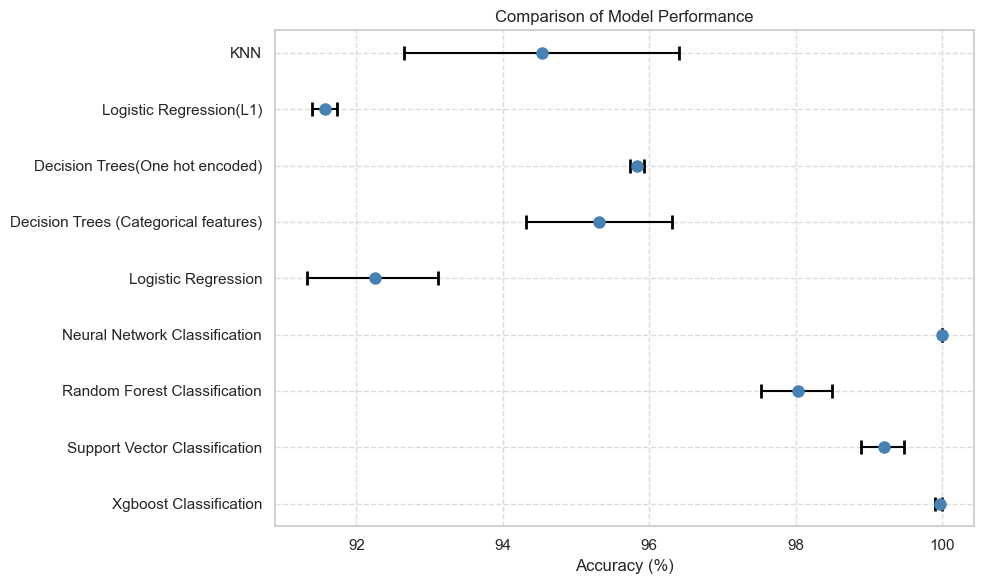

In [115]:
# Plotting the data
models = ['Xgboost Classification','Support Vector Classification','Random Forest Classification',
          'Neural Network Classification','Logistic Regression',   
          'Decision Trees (Categorical features)',
          'Decision Trees(One hot encoded)', 'Logistic Regression(L1)', 'KNN']

# Define mean accuracy values and error ranges for each model
means = [99.969, 99.198, 98.025, 100, 92.253, dt_mean_categorical, dt_mean_oneHot, l_mean, k_mean ]
lower_error = [0.062, 0.309, 0.494, 0.0, 0.926, np.sqrt(dt_var_categorical), np.sqrt(dt_var_oneHot),
               np.sqrt(l_var), np.sqrt(k_var)]
upper_error = [0.031, 0.277, 0.463, 0.0, 0.864, np.sqrt(dt_var_categorical), 
               np.sqrt(dt_var_oneHot), np.sqrt(l_var), np.sqrt(k_var)]

error = [lower_error, upper_error]

fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(means, models, xerr=error, fmt='o', color='steelblue', ecolor='black',capsize=5, markersize=8, capthick=2, linestyle='None')

ax.set_xlabel('Accuracy (%)')
ax.set_title('Comparison of Model Performance')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
